本脚本研究两张图片的融合问题

In [1]:
# import read code tool
import sys
import os.path as osp
sys.path.append('/home/wushaogui/ReadCode/')
from my_read_code_tools import *

copy from[LearnOpenCV](https://github.com/spmallick/learnopencv)

以下代码实现了图片的混合，主要逻辑：

1. 读取图片，并使用图片的alpha通道分离出图片
2. 前景图片*alpha,使得非目标区域为0值（即背景）
3. 背景图片*(1-alpha),使得目标区域0值，非目标区域还是原始背景
4. 2+3得到的图片就将前景图片贴到背景图片

(704, 1000, 4)


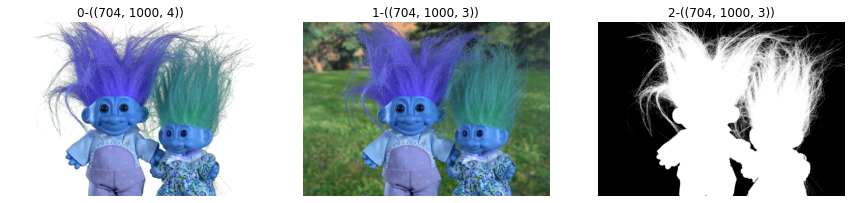

In [2]:
# Copyright 2017 by  Sunita Nayak <nayak.sunita@gmail.com>
import cv2

# Read the foreground image with alpha channel
foreGroundImage = cv2.imread("/home/wushaogui/ReadCode/Learning_opencv/AlphaBlending/foreGroundAsset.png", cv2.IMREAD_UNCHANGED)
print(foreGroundImage.shape)

# Split png foreground image
b,g,r,a = cv2.split(foreGroundImage)

# Save the foregroung RGB content into a single object
foreground = cv2.merge((b,g,r))

# Save the alpha information into a single Mat
alpha = cv2.merge((a,a,a))

show_images([foreGroundImage,foreground,alpha])

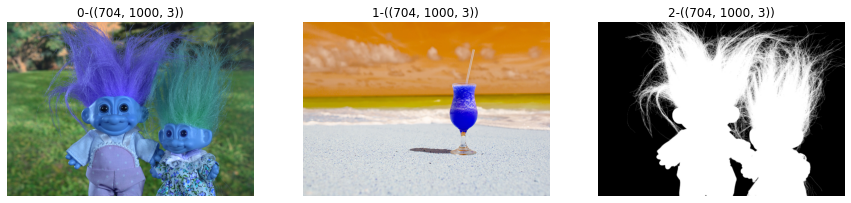

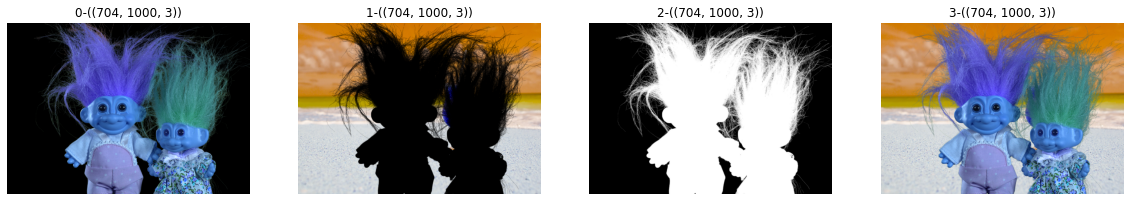

In [3]:
# Read background image
background = cv2.imread("/home/wushaogui/ReadCode/Learning_opencv/AlphaBlending/backGround.jpg")

# Convert uint8 to float
foreground = foreground.astype(float)
background = background.astype(float)
alpha = alpha.astype(float)/255
show_images([foreground,background,alpha*255],nrows=1)


# Perform alpha blending
foreground = cv2.multiply(alpha, foreground)
background = cv2.multiply(1.0 - alpha, background)
outImage = cv2.add(foreground, background)

cv2.imwrite("/home/wushaogui/ReadCode/Learning_opencv/AlphaBlending/outImgPy.png", outImage)

show_images([foreground,background,alpha*255,outImage],nrows=1)